In [1]:
%pylab inline
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft,fftfreq,ifft
from scipy.io import wavfile
from scipy.signal import convolve


Populating the interactive namespace from numpy and matplotlib


In [2]:
fs, data = wavfile.read('Darth_Vader.wav')
fsi, datai = wavfile.read('mivoz.wav')


In [3]:
fs=fs*0.8

In [4]:
data_norm=data*1./abs(data).max()
datai_norm=datai*1./abs(datai).max()

In [5]:
n_t=len(data)-1
n_ti=len(datai)-1



In [6]:
x=[]
for i in range (len(data)-1):
    x.append(data[i][0])
xi=[]
for i in range (len(datai)-1):
    xi.append(datai[i][0])
x=x+1.4*(np.random.rand(len(x))+0.7)

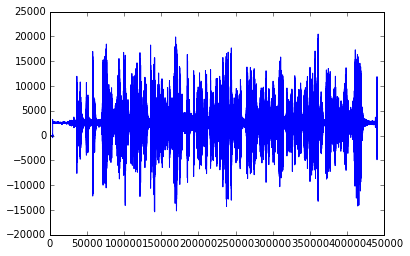

In [7]:
plt.plot(x)


In [8]:
fft_xx = fft(x) / len(x)
freq=fftfreq(n_t,1/(fs*1.)) 
fft_xxi = fft(xi) / len(xi)
freqi=fftfreq(n_t,1/(fsi*1.)) 
print len(fft_xx)
print len(fft_xxi)
print len(freq)
print len(freqi)

440319
441175
440319
440319


In [9]:
fft_x=[0]
for i in range (1,len(fft_xx)):
    fft_x.append(fft_xx[i])
print len (fft_x)
fft_xi=[0]
for i in range (1,len(fft_xxi)):
    fft_xi.append(fft_xxi[i])
print len (fft_xi)
print len(freq)
print len(freqi)

440319
441175
440319
440319


(-8000, 8000)

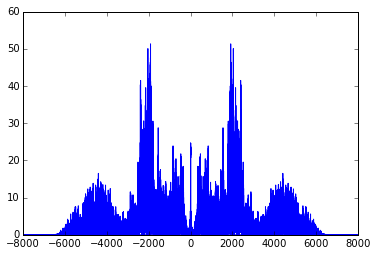

In [10]:
plt.plot(freq,np.abs(fft_x))
plt.xlim(-8000,8000)



In [11]:
fft_c=[]
for i in range (len(fft_x)):
    fft_c.append(fft_xi[i])
len(fft_c)
for i in range (len(fft_x)/6,len(fft_x)):
    fft_c[i]=fft_c[i]/6
len(fft_c)

440319

In [12]:
freq1=[]
for i in range (0,len(freq)):
    freq1.append(freqi[i])
len (freq1)

440319

In [13]:

clean_f = ifft(fft_c) 
wavfile.write('mivozdarth.wav',fs,np.real(clean_f))